<a href="https://colab.research.google.com/github/SeyedJalaleddinMousavirad/Pytorch/blob/main/04_Linear_Classification_with_Logits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In this notebook, we would like to use BCE with logits! Indeed, sigmoid is a type of exponentional operation

exponential is numerically unstable since it changes dramatically with respect to the input

Binary cross entropy has also a log in it
Logit is the input into the logistic function

To use logits, everything is exactly the same with the earlier source code except three things: 1) create the model and 2) optimiser and 3) making predictions

In [2]:
#load data
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
#Split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.data,data.target,test_size=0.33)
N, D=x_train.shape

In [5]:
#Normalisation

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [6]:
#Build the model
#we do not need any Sigmoid since it is included in the cost function
model = nn.Linear(D,1)


In [8]:
#Loss and Optimiser
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [9]:
#Convert data to torch data
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

In [10]:
#Train the model
n_epoch=1000

train_losses=np.zeros(n_epoch)
test_losses=np.zeros(n_epoch)

for it in range(n_epoch):
  optimizer.zero_grad()

  #Forward pass
  outputs = model(x_train)
  loss = criterion (outputs, y_train)

  #Backward and optimise
  loss.backward()
  optimizer.step()

  #Get test loss
  outputs_test = model (x_test)
  loss_test = criterion(outputs_test,y_test)

  #Save loss
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()

  if(it+1) % 50 ==0:
    print(f'Epoch {it+1}/{n_epoch}, train loss= {loss.item():.4f}, test loss={loss_test.item():.4f}')

Epoch 50/1000, train loss= 0.4094, test loss=0.3933
Epoch 100/1000, train loss= 0.3078, test loss=0.2923
Epoch 150/1000, train loss= 0.2525, test loss=0.2411
Epoch 200/1000, train loss= 0.2169, test loss=0.2093
Epoch 250/1000, train loss= 0.1918, test loss=0.1874
Epoch 300/1000, train loss= 0.1731, test loss=0.1713
Epoch 350/1000, train loss= 0.1586, test loss=0.1588
Epoch 400/1000, train loss= 0.1469, test loss=0.1489
Epoch 450/1000, train loss= 0.1373, test loss=0.1409
Epoch 500/1000, train loss= 0.1293, test loss=0.1343
Epoch 550/1000, train loss= 0.1225, test loss=0.1287
Epoch 600/1000, train loss= 0.1167, test loss=0.1240
Epoch 650/1000, train loss= 0.1116, test loss=0.1199
Epoch 700/1000, train loss= 0.1071, test loss=0.1164
Epoch 750/1000, train loss= 0.1031, test loss=0.1133
Epoch 800/1000, train loss= 0.0995, test loss=0.1105
Epoch 850/1000, train loss= 0.0963, test loss=0.1081
Epoch 900/1000, train loss= 0.0934, test loss=0.1059
Epoch 950/1000, train loss= 0.0908, test loss=0

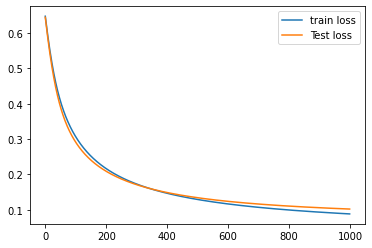

In [11]:
plt.plot(train_losses, label= 'train loss')
plt.plot(test_losses, label= 'Test loss')
plt.legend()
plt.show()

In [13]:
#get accuracy
with torch.no_grad():
  p_train = model (x_train)
  p_train = np.round(p_train.numpy()>0)
  train_acc = np.mean (y_train.numpy() ==p_train)
  
  p_test=model (x_test)
  p_test = np.round(p_test.numpy()>0)
  test_acc = np.mean(y_test.numpy() ==p_test)

  print(f"train acc: {train_acc: .4f}, Test acc={test_acc:.4f}")


train acc:  0.9843, Test acc=0.9734
